In [1]:
%run ../import.py

data_pd_format = pd.read_csv('../clean_data/data_with_features.csv')
import seaborn
%matplotlib inline

[INFO] This trial license of GraphLab Create is assigned to barath.nitt@gmail.com and will expire on November 01, 2015. Please contact trial@dato.com for licensing options or to request a free non-commercial license for personal or academic use.

[INFO] Start server at: ipc:///tmp/graphlab_server-3160 - Server binary: /Users/Barath/anaconda/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1444754824.log
[INFO] GraphLab Server Version: 1.6.1


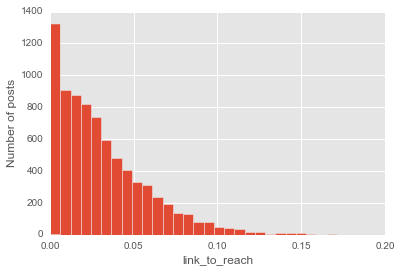

In [2]:
data_pd_format.link_to_reach.plot(kind = 'hist',bins = 30)
#plt.xlim(0,10000)
plt.ylabel('Number of posts')
plt.xlabel('link_to_reach')

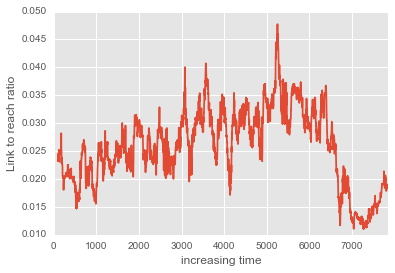

In [32]:
#Reverse data to get proper time series
data_pd_format.reindex(index=data_pd_format.index[::-1]);
pd.rolling_median(data_pd_format.link_to_reach,100).plot()
plt.ylabel('Link to reach ratio')
plt.xlabel('increasing time')

In [4]:
day_analysis = data_pd_format.groupby(['daynumber'])['link_to_reach'].median()
hour_analysis = data_pd_format.groupby(['hour'])['link_to_reach'].median()
monthyear_analysis = data_pd_format.groupby(['monthyear'])['link_to_reach'].median()

([<matplotlib.axis.XTick at 0x10fe02450>,
 <a list of 7 Text xticklabel objects>)

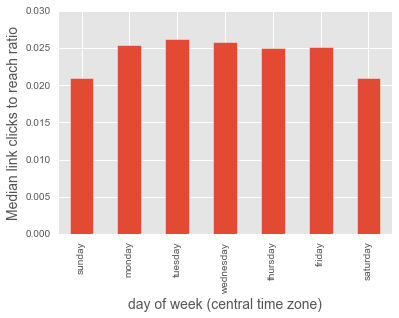

In [5]:
day_analysis.plot(kind = 'bar')
plt.xlabel( 'day of week (central time zone)',fontsize = 14)
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
plt.xticks(np.arange(7), ('sunday','monday','tuesday','wednesday','thursday','friday','saturday'))
#plt.savefig('day.png', bbox_inches='tight')

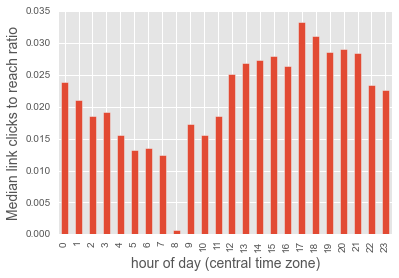

In [6]:
hour_analysis.plot(kind = 'bar')
plt.xlabel( 'hour of day (central time zone)',fontsize = 14)
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
#plt.ylim(0,1000)
#plt.xticks(np.arange(7), ('sunday','monday','tuesday','wednesday','thursday','friday','saturday'))


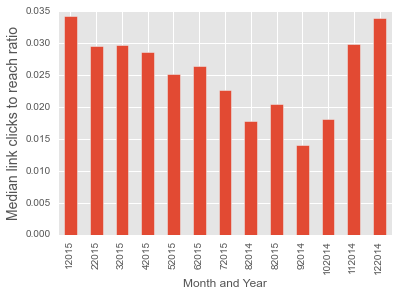

In [7]:
monthyear_analysis.plot(kind = 'bar')
plt.xlabel( 'Month and Year',fontsize = 12)
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
#plt.ylim(0,1000)
#plt.xticks(np.arange(7), ('sunday','monday','tuesday','wednesday','thursday','friday','saturday'))
plt.savefig('monthyear.png', bbox_inches='tight')

In [8]:
data_pd_format['word_count_buckets'] = pd.qcut(data_pd_format.word_count,10)
grouped = data_pd_format.groupby(['word_count'])
word_count_analysis = grouped['link_to_reach'].agg({'number':np.count_nonzero,'median_link_to_reach':np.median})
#word_count_analysis.plot(kind = 'bar')

,number,median_link_to_reach
word_count,,
10,59,0.021957
11,78,0.023773
12,95,0.020373
13,106,0.022896
14,171,0.023639
15,185,0.026298
16,233,0.025681
17,253,0.024200
18,302,0.026559


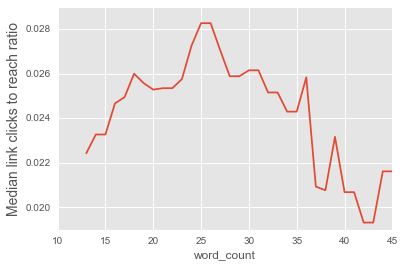

In [9]:
word_count_analysis = pd.DataFrame(word_count_analysis)
#if there are fewer than 30 posts with a particular word_count we can't really make conclusions based on that
word_count_analysis = word_count_analysis[word_count_analysis.number > 50]

pd.rolling_median(word_count_analysis.median_link_to_reach,4).plot()
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
word_count_analysis

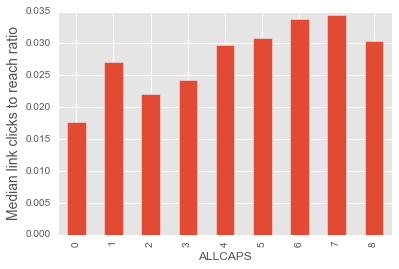

In [10]:
grouped = data_pd_format.groupby(['ALLCAPS'])
ALLCAPS_analysis = grouped['link_to_reach'].agg({'number':np.count_nonzero,'median_link_to_reach':np.median})
ALLCAPS_analysis = ALLCAPS_analysis[ALLCAPS_analysis.number > 40 ]
ALLCAPS_analysis.median_link_to_reach.plot(kind = 'bar')
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)

,number,median_link_to_reach
women,,
0,5035,0.020847
1,1620,0.028682
2,615,0.038730
3,190,0.042910
4,65,0.049916


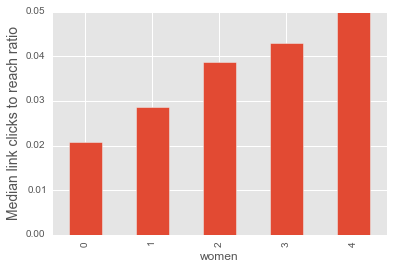

In [11]:
grouped = data_pd_format.groupby(['women'])
women_analysis = grouped['link_to_reach'].agg({'number':np.count_nonzero,'median_link_to_reach':np.median})
women_analysis = women_analysis[women_analysis.number > 40 ]
women_analysis.median_link_to_reach.plot(kind = 'bar')
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
women_analysis


,number,median_link_to_reach
sex,,
0,7325,0.024187
1,181,0.030736
2,51,0.035192


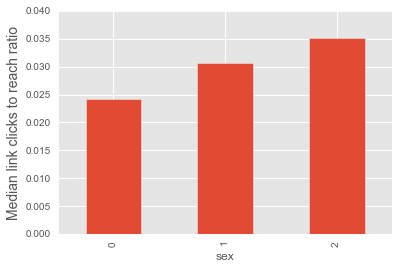

In [12]:
grouped = data_pd_format.groupby(['sex'])
sex_analysis = grouped['link_to_reach'].agg({'number':np.count_nonzero,'median_link_to_reach':np.median})
sex_analysis = sex_analysis[sex_analysis.number > 40 ]
sex_analysis.median_link_to_reach.plot(kind = 'bar')
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
sex_analysis

,number,median_link_to_reach
video,,
0,7128,0.024041
1,366,0.029846
2,59,0.044497


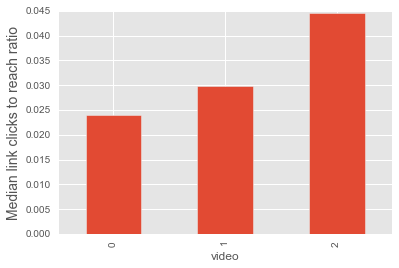

In [13]:
grouped = data_pd_format.groupby(['video'])
video_analysis = grouped['link_to_reach'].agg({'number':np.count_nonzero,'median_link_to_reach':np.median})
video_analysis = video_analysis[video_analysis.number > 40 ]
video_analysis.median_link_to_reach.plot(kind = 'bar')
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
video_analysis


,number,median_link_to_reach
majorcrime,,
0,4518,0.021544
1,1710,0.026942
2,864,0.030432
3,328,0.032299
4,101,0.031920


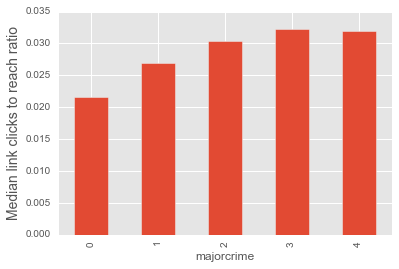

In [14]:
grouped = data_pd_format.groupby(['majorcrime'])
majorcrime_analysis = grouped['link_to_reach'].agg({'number':np.count_nonzero,'median_link_to_reach':np.median})
majorcrime_analysis = majorcrime_analysis[majorcrime_analysis.number > 40 ]
majorcrime_analysis.median_link_to_reach.plot(kind = 'bar')
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
majorcrime_analysis

,number,median_link_to_reach
minorcrime,,
0,6641,0.023487
1,757,0.030314
2,136,0.029674


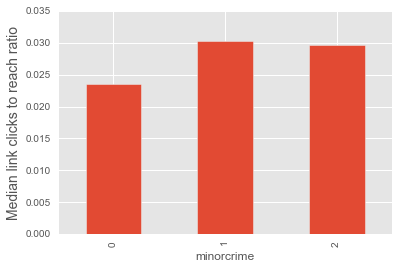

In [15]:
grouped = data_pd_format.groupby(['minorcrime'])
minorcrime_analysis = grouped['link_to_reach'].agg({'number':np.count_nonzero,'median_link_to_reach':np.median})
minorcrime_analysis = minorcrime_analysis[minorcrime_analysis.number > 40 ]
minorcrime_analysis.median_link_to_reach.plot(kind = 'bar')
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
minorcrime_analysis

,number,median_link_to_reach
year,,
0,6226,0.023332
1,1204,0.030642
2,123,0.029361


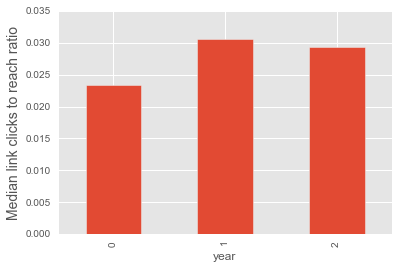

In [16]:
grouped = data_pd_format.groupby(['year'])
year_analysis = grouped['link_to_reach'].agg({'number':np.count_nonzero,'median_link_to_reach':np.median})
year_analysis = year_analysis[year_analysis.number > 40 ]
year_analysis.median_link_to_reach.plot(kind = 'bar')
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
year_analysis

,number,median_link_to_reach
viral,,
0,6984,0.024140
1,554,0.027864


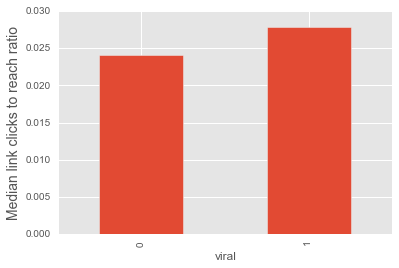

In [17]:
grouped = data_pd_format.groupby(['viral'])
viral_analysis = grouped['link_to_reach'].agg({'number':np.count_nonzero,'median_link_to_reach':np.median})
viral_analysis = viral_analysis[viral_analysis.number > 40 ]
viral_analysis.median_link_to_reach.plot(kind = 'bar')
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
viral_analysis

,number,median_link_to_reach
number,,
0,4346,0.027913
1,398,0.033477
2,933,0.025144
3,436,0.017268
4,611,0.010746
5,276,0.014355
6,254,0.012830
7,90,0.007603
8,74,0.009590


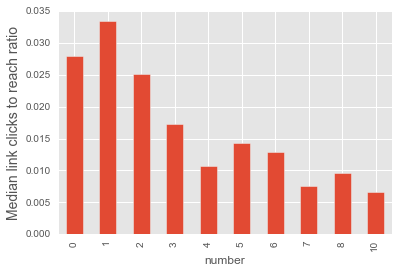

In [18]:
grouped = data_pd_format.groupby(['number'])
number_analysis = grouped['link_to_reach'].agg({'number':np.count_nonzero,'median_link_to_reach':np.median})
number_analysis = number_analysis[number_analysis.number > 40]
number_analysis.median_link_to_reach.plot(kind = 'bar')
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
number_analysis

,number,median_link_to_reach
politics,,
0,7399,0.024817
1,138,0.012271


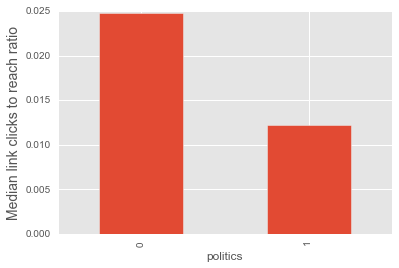

In [19]:
grouped = data_pd_format.groupby(['politics'])
politics_analysis = grouped['link_to_reach'].agg({'number':np.count_nonzero,'median_link_to_reach':np.median})
politics_analysis = politics_analysis[politics_analysis.number > 40 ]
politics_analysis.median_link_to_reach.plot(kind = 'bar')
plt.ylabel('Median link clicks to reach ratio',fontsize = 14)
politics_analysis

In [33]:
full_data = pd.read_csv('../clean_data/pix_full_data_with_topics_features.csv')

In [36]:
score_list = []
numtopics = 8
for i in np.arange(numtopics):
    name = 'topic' + str(i+1) 
    score = 0
    score = score + np.mean(full_data[name]*full_data['link_to_reach'])
    score_list.append([name,score]) 
score_list = pd.DataFrame(score_list, columns=['topic','score'])
score_list

,topic,score
0,topic1,0.131299
1,topic2,0.073767
2,topic3,0.047256
3,topic4,0.030317
4,topic5,0.042217
5,topic6,0.046082
6,topic7,0.047659
7,topic8,0.031094


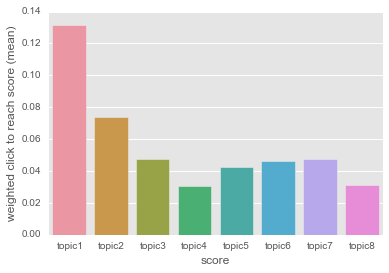

In [39]:
%run ../import.py
#rc={'font.size': 16, 'axes.labelsize': 16, 'legend.fontsize': 16.0, 
#    'axes.titlesize': 16, 'xtick.labelsize': 16, 'ytick.labelsize': 16}
#sns.set(rc=rc)
#sns.plotting_context()
snsplot = sns.barplot(y='score',x='topic',data=score_list)
plt.xlabel('score')
plt.ylabel('weighted click to reach score (mean)')
plt.yticks(rotation=0)